# Exploratory Data Analysis

In [41]:
# import libraries

import pandas as pd # data analysis library
import numpy as np # mathy library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # statistical data visualization library

data = pd.read_csv('/Users/ruitao/electronics_sales_analysis/data/processed/electronics_cleaned.csv') # read data from csv file

data.head() # display first 5 rows of the dataframe

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [3]:
data.tail() # display last 5 rows of the dataframe

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,8332,1090033,5.0,2018-01-09,Female,Computers & Accessories,IRULU,2015,NaN,0
1292950,8332,1105316,1.0,2018-02-17,Female,Computers & Accessories,IRULU,2015,NaN,0
1292951,6983,1105318,4.0,2018-02-17,Female,Computers & Accessories,IRULU,2015,NaN,0
1292952,8332,1143213,5.0,2018-06-14,Female,Computers & Accessories,IRULU,2015,NaN,0
1292953,8332,1153024,1.0,2018-07-27,Female,Computers & Accessories,IRULU,2015,NaN,0


In [ ]:
shape = data.shape 
print(shape) # shape
data.info() # info types
data.describe()

(1292954, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [11]:
data.nunique() # number of unique values in each column


item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              49
year               20
user_attr           2
split               3
dtype: int64

In [ ]:
data.duplicated().sum() # checking again for duplicated values

np.int64(0)

In [18]:
# the distribution of ratings

data['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [ ]:
# creating new column for year bought
# distribution of sales by year

data['year bought'] = pd.DatetimeIndex(data['timestamp']).year
data['year bought'].value_counts().sort_index()

year bought
1999        47
2000       187
2001       403
2002       481
2003       833
2004      1275
2005      2170
2006      2614
2007      6798
2008      9428
2009     12804
2010     16888
2011     23894
2012     38389
2013     99855
2014    180676
2015    320887
2016    302619
2017    192477
2018     80229
Name: count, dtype: int64

In [20]:
# distribution of sales by month

data['month bought'] = pd.DatetimeIndex(data['timestamp']).month
data['month bought'].value_counts().sort_index()


month bought
1     140773
2     110546
3     116464
4      99136
5      98207
6      96317
7     107612
8     109835
9      97368
10     95084
11     97015
12    124597
Name: count, dtype: int64

# Visualizations

<Axes: xlabel='rating', ylabel='count'>

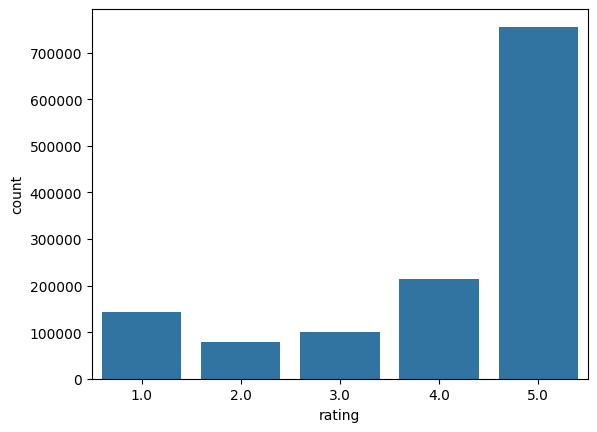

In [ ]:
# rating distribution

sns.countplot(x='rating', data=data)

<Axes: xlabel='year', ylabel='count'>

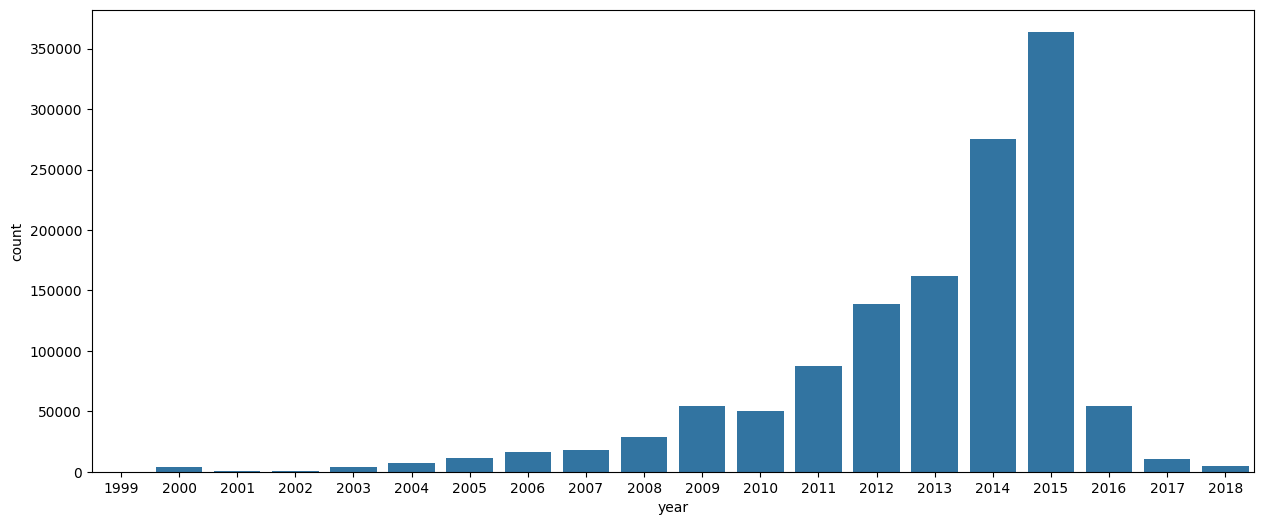

In [43]:
# distribution of sales by year

plt.figure(figsize=(15, 6))
sns.countplot(x='year', data=data)

In [ ]:
# checking why sales are lower in 2017 - 2018

data['year_month'] = data['timestamp'].dt.to_period('M')
print(data.groupby('year')['year_month'].nunique())

# Only 10 months of data were collected for 2018, but that doesn't fully explain the significant drop in sales in 2017 - 2018
# Likely external factors affected sales during this period - rise of smartphones, streaming, etc.


Months of data per year:
year
1999     6
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    10
Name: year_month, dtype: int64


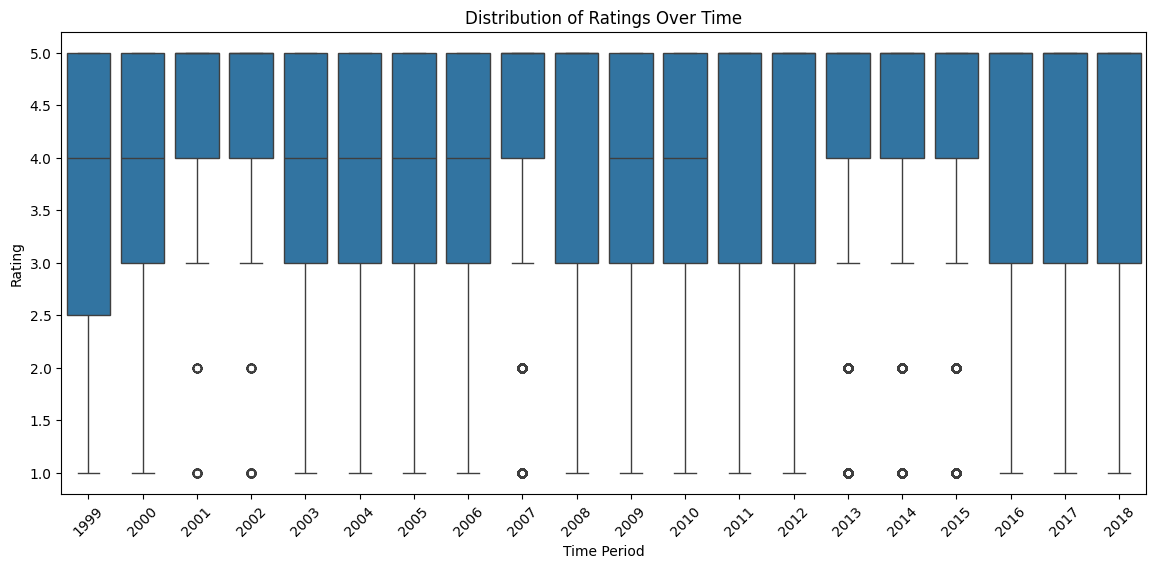

In [22]:
# converting timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# extracting year from timestamp
data['year'] = data['timestamp'].dt.year

# Box plot of distribution of ratings over time
plt.figure(figsize=(14, 6))
data['year_str'] = data['year'].astype(str) # convert year to string for better x-axis labels
sns.boxplot(data=data, x='year_str', y='rating') # box plot
plt.title('Distribution of Ratings Over Time')
plt.xlabel('Time Period')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# 1. Consistent positive performance with median stable around rating of 4
# 2. Stable rating system with no signs of rating inflation

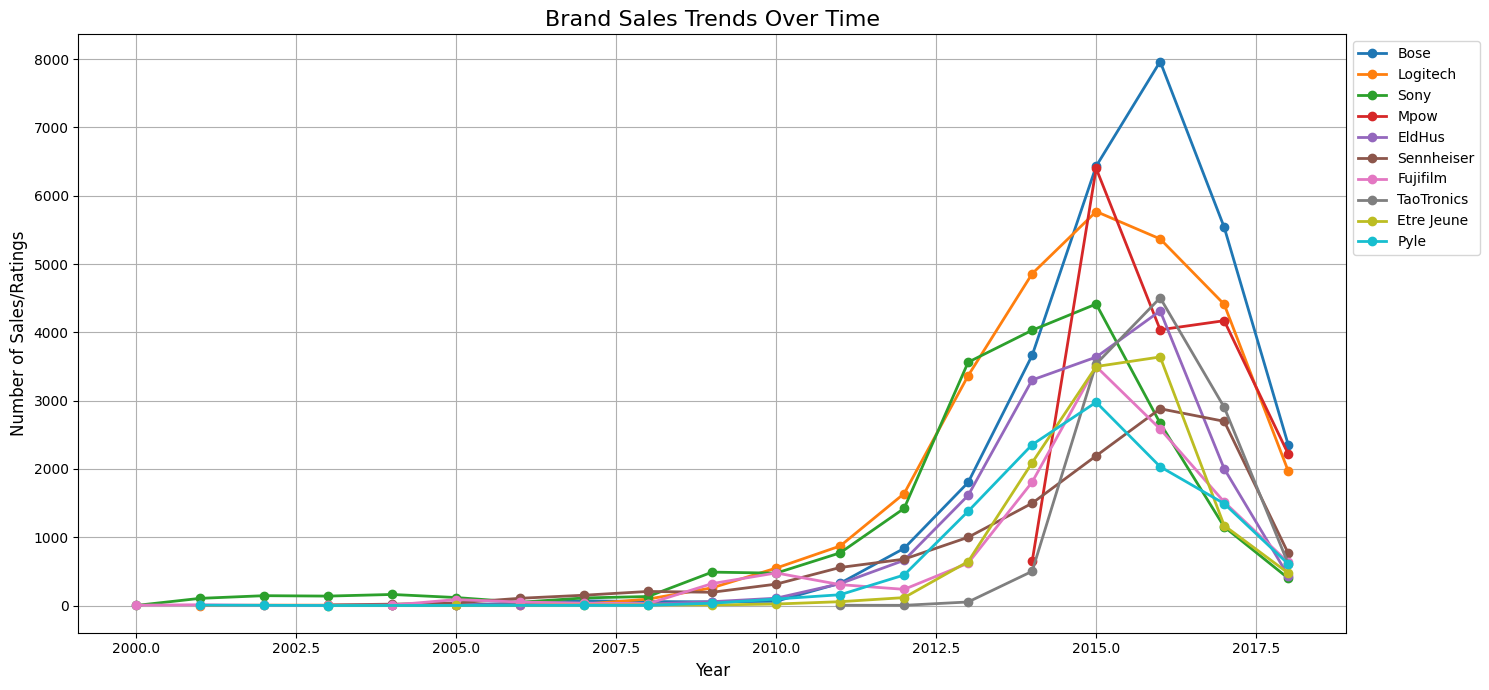

In [ ]:
# Brand Trends

brand_sales = data[data['brand'].notna()]['brand'].value_counts() # sales by brand
top_brands = brand_sales.head(10).index # top 10 brands

brand_data = data[data['brand'].isin(top_brands)] # filter data for top brands

# Line plot of brand sales trends over time
plt.figure(figsize=(15, 7))
for brand in top_brands:
    brand_sales_overtime = brand_data[brand_data['brand'] == brand].groupby('year').size() 
    plt.plot(brand_sales_overtime.index, brand_sales_overtime.values, 
             marker='o', label=brand, linewidth=2) 

plt.title('Brand Sales Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sales/Ratings', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Bose, Logitech, Mpow currently still leading brands
# 2. Entire industry as a whole appears to be declining

<Axes: xlabel='month', ylabel='count'>

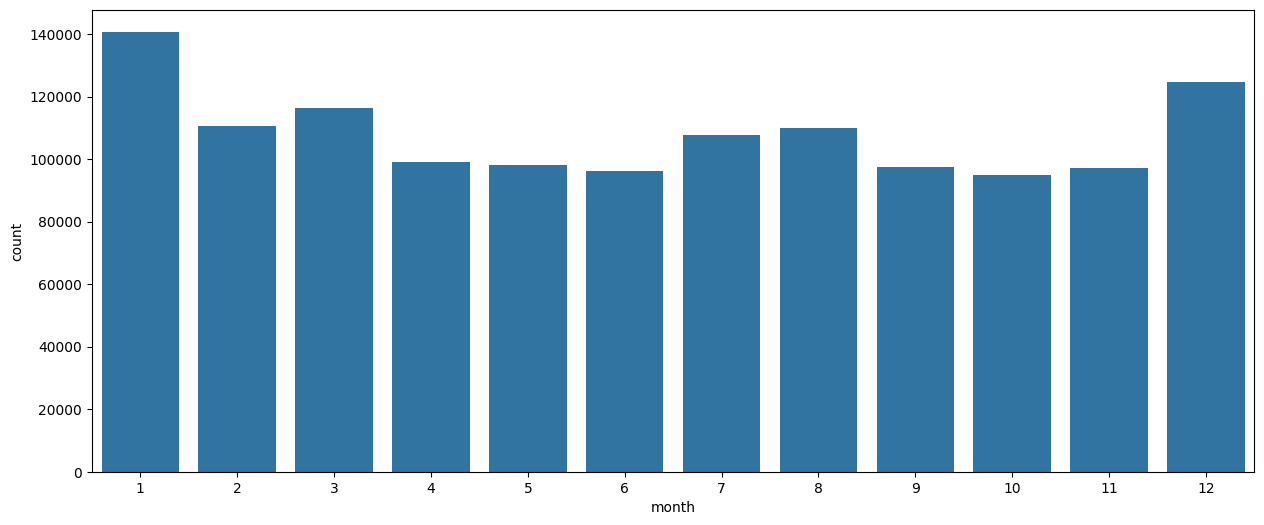

In [ ]:
# month with most sales

data['month'] = pd.DatetimeIndex(data['timestamp']).month # extract month from timestamp

plt.figure(figsize=(15, 6))
sns.countplot(x='month', data=data)

# January and December are the months with most sales

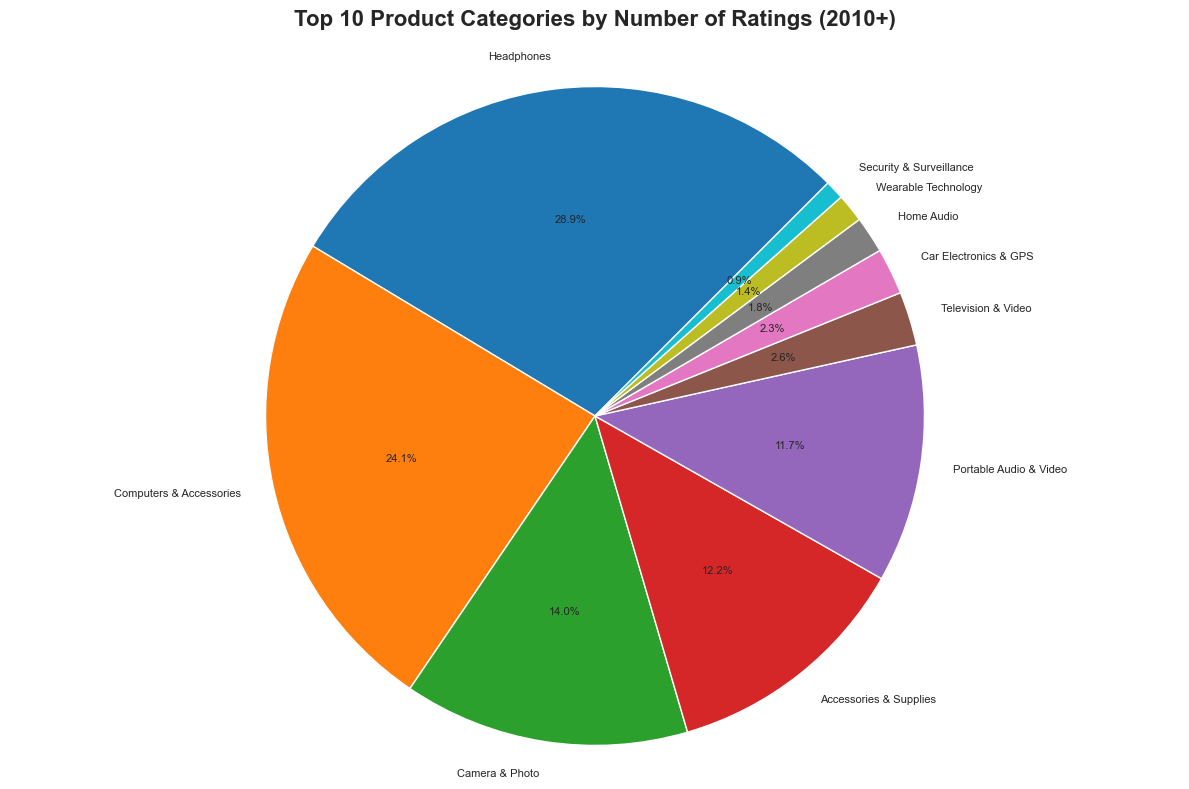

In [ ]:
# Filter data for 2010 onwards
data_filtered = data[data['year'] >= 2010]

# Set background
sns.set_style('white')

# Create the pie chart with customizations
plt.figure(figsize=(12, 8))

category_counts = data_filtered.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

plt.pie(category_counts, 
        labels=category_counts.index,  # Category names
        autopct='%1.1f%%',  # Show percentages
        startangle=45,  # Rotate start angle
        textprops={'fontsize': 8})  # Font size for labels

plt.title('Top 10 Product Categories by Number of Ratings (2010+)', 
         fontsize=16, fontweight='bold', pad=20)

plt.axis('equal')  # Equal aspect ratio ensures circular pie
plt.tight_layout()
plt.show()

# Top categories are Headphones, Computers & Accessories, and Cameras & Photos

In [ ]:
# Current Conclusions:

# 1. 2015 had the best sales but the industry has been declining rapidly since then.
# 2. Ratings have remained consistently positive over time with no signs of rating inflation.
# 3. Bose, Logitech, and Mpow are currently the leading brands, but all brands are experiencing declining sales.
# 4. Headphones, Computers & Accessories, and Cameras & Photos are the top product categories.
# 5. Sales peak in January and December, likely due to holiday shopping.